In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from necklace_model import Necklace
from simulated_annealing import Annealer
%load_ext snakeviz

In [20]:
# Set the main variables
N = 100 # Ensemble size
n = 100000# Number of temperature steps

### Problem 2a
Given an infinite temperature, the metropolis algorithm accepts any new state of the necklace. Therefore the simulated annealing, with a constant infinite temperature, is equal to a random search and can only result in the global minimum if the algorithm directly hits it (with luck).

In [21]:
temps_a = np.repeat(np.inf,n)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps_a)
energyArr_a,energyVBSF_a = anl.run(N)

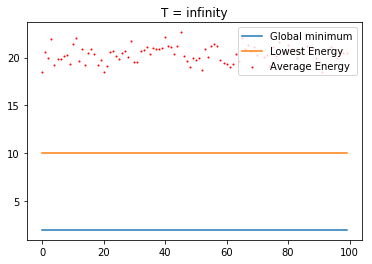

In [10]:
plt.scatter(range(len(energyArr_a)),energyArr_a, c='red',alpha=1,s=1,label = 'Average Energy')
plt.plot(len(temps_a)*[2],label='Global minimum')
plt.plot(energyVBSF_a,label='Lowest Energy')
plt.legend()
plt.title('T = infinity')
plt.savefig('plots/problem2a.png')

### Problem 2b
At zero temperature, the metropolis algorithm only accepts new states with smaller energy. Hence the energy decreases directly, but might be trapped in a local minimum. If the global minimum can only be reached with going up a hill, the algorithm will never find it.

In [11]:
temps_b = np.repeat(0,n)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps_b)
energyArr_b,energyVBSFArr_b = anl.run(N)

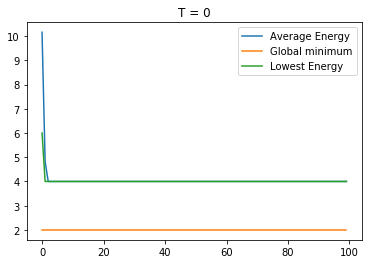

In [13]:
plt.plot(energyArr_b,label='Average Energy')
plt.plot(len(temps_b)*[2],label='Global minimum')
plt.plot(energyVBSFArr_b,label='Lowest Energy')
plt.legend()
plt.title('T = 0')
plt.savefig('plots/problem2b.png')

### Problem 2c
We use the boundaries $T(t=0) = 40$ and $T(t=99999) = 0.5$ to calculate the values of $a,b$. At the beginning of the exponential decay, the temperature is very high and therefore the average energy is comparable to a random search. The smaller temperatures for larger time scales, lead the particles to go down and be captured at the minima. Through the random search in the beginning particles are spread over the complete state space. Hence it is probable that one particle finds the global minimum.

In [14]:
temps = np.linspace(0,n,n)
b = -np.max(temps)/np.log(0.5/40)
temps_c = 40*np.exp(-temps/b)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps_c)
energyArr_c,energyVBSFArr_c = anl.run(N)

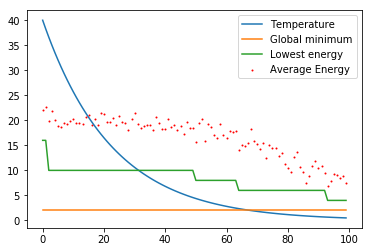

In [17]:
plt.plot(temps_c,label = 'Temperature')
plt.plot(len(temps_c)*[2],label='Global minimum')
plt.scatter(range(len(energyArr_c)),energyArr_c, c='red',alpha=1,s=1,label = 'Average Energy')
plt.plot(energyVBSFArr_c, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2c.png')

### Problem 2d
$a,b$ are calculated by the boundary conditions as above. 
In comparison to the exponential decay this anti-proportional schedule has a smaller time period, where the annealing behaves like a random search. Therefore the average energy decreases faster and the global minimum is found faster than for the exponential decay. 

In [18]:
temps = np.linspace(0,n,n)
b = 39.5/(0.5*np.max(temps))
temps_d = 40/(1+b*temps)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps_d)
energyArr_d,energyVBSFArr_d = anl.run(N)

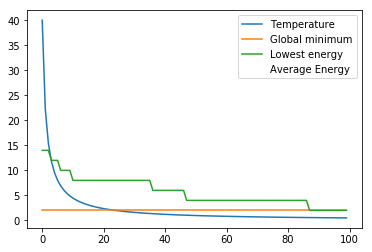

In [19]:
plt.plot(temps_d,label = 'Temperature')
plt.plot(len(temps_d)*[2],label='Global minimum')
plt.scatter(range(len(energyArr_d)),energyArr_d, c='red',alpha=0.1,s=0.01,label = 'Average Energy')
plt.plot(energyVBSFArr_d, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2d.png')

### Problem 2e
This temperature schedule has the steepest slope in the beginning and thus no random search behavior. Since the temperature is rather small for most of the time, this schedule will bring every particle to a local minimum. However the long time range with small temperature gives few particles the chance to escape their minimum and choose a neighboring area. But a particle will most of the time stay close around its area.

In [41]:
temps = np.linspace(0,n,n)
b = 39.5/(0.5*np.log(np.max(temps)+1))
temps_e = 40/(1+b*np.log(temps+1))
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps_e)
energyArr_e,energyVBSFArr_e = anl.run(N)

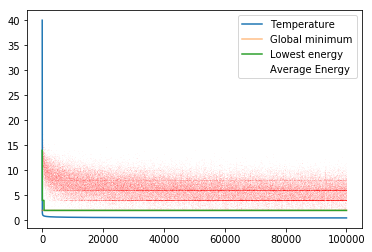

In [43]:
plt.plot(temps_e,label = 'Temperature')
plt.plot(len(temps_e)*[2],label='Global minimum',alpha=0.5)
plt.scatter(range(len(energyArr_e)),energyArr_e, c='red',alpha=0.1,s=0.01,label = 'Average Energy')
plt.plot(energyVBSFArr_e, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2e.png')

## Temperature plots


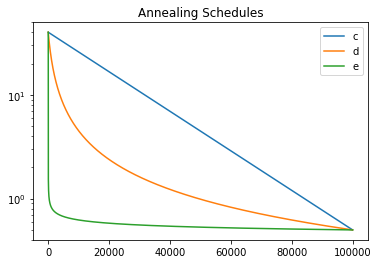

In [13]:
plt.semilogy(temps_c,label='c')
plt.semilogy(temps_d,label='d')
plt.semilogy(temps_e,label='e')
plt.legend()
plt.title('Annealing Schedules')
plt.savefig('plots/temps.png')